In [1]:
import tensorflow as tf

In [2]:
import keras

Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [4]:
classifier = Sequential()

In [5]:
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

C:\Users\Sai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [6]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [7]:
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

C:\Users\Sai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [8]:
classifier.add(Flatten())

In [9]:
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

C:\Users\Sai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.
C:\Users\Sai\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


In [10]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
import os

In [16]:
os.getcwd()

'C:\\Users\\Sai'

In [18]:
os.chdir('F:\Python\Data')

In [19]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 8000 images belonging to 2 classes.


In [20]:
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 2000 images belonging to 2 classes.


In [21]:
classifier.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 3, # nb_epoch = 25,
                         validation_data = test_set,
                         nb_val_samples = 2000)


C:\Users\Sai\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
C:\Users\Sai\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=250, epochs=3, validation_steps=2000)`
  """


Epoch 1/3
250/250 [==============================] - 569s - loss: 0.6836 - acc: 0.5560 - val_loss: 0.6198 - val_acc: 0.6879
Epoch 2/3
250/250 [==============================] - 568s - loss: 0.6001 - acc: 0.6740 - val_loss: 0.5573 - val_acc: 0.7226
Epoch 3/3
250/250 [==============================] - 568s - loss: 0.5522 - acc: 0.7125 - val_loss: 0.5595 - val_acc: 0.7094


In [22]:
import numpy as np
from keras.preprocessing import image

In [23]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))

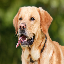

In [24]:
test_image

In [25]:
test_image = image.img_to_array(test_image)

In [26]:
test_image = np.expand_dims(test_image, axis = 0)

In [27]:
result = classifier.predict(test_image)

In [28]:
result

array([[ 1.]], dtype=float32)

In [29]:
print(training_set.class_indices)


{'cats': 0, 'dogs': 1}


In [30]:
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'


In [31]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'


In [32]:
print(prediction)

cat
